In [2]:
import numpy as np
import pandas as pd
from scipy import io
from skmultilearn import problem_transform
from sklearn import model_selection, svm, preprocessing, \
  ensemble, naive_bayes, neighbors, tree, metrics
import matplotlib.pyplot as plt

In [3]:
data = io.loadmat('../data/CHD_49.mat')
x = data['data']
y = data['targets']

x = preprocessing.MinMaxScaler().fit_transform(x)
y = preprocessing.MinMaxScaler().fit_transform(y)

In [4]:
parameters_6_classifiers = [{
  'classifier': [
    ensemble.RandomForestClassifier(),
    naive_bayes.MultinomialNB(),
    neighbors.KNeighborsClassifier(),
    svm.LinearSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier()
  ],
},]

parameters_svc = [{
  'classifier': [svm.SVC()],
  'classifier__C': np.logspace(-4, 4, 9),
  'classifier__gamma' :  np.logspace(-4, 4, 9)
}]

In [60]:
def foo(model, params):
    model = model_selection.GridSearchCV(
      model,
      params,
      scoring={
          'accuracy': 'accuracy',
          'f1_macro': 'f1_macro',
          'f1_micro': 'f1_micro',
          'hamming_score': metrics.make_scorer(metrics.hamming_loss)
      },
      refit='accuracy',
      return_train_score=True
    )


    model.fit(x, y)
    print (model.best_params_, model.best_score_)
    print(pd.DataFrame(model.cv_results_))
    return model

In [6]:
def plot(d, x, y):
    for i in x:
        for j in y:
            d.plot.bar(x=i, y=j)
            plt.xticks(rotation=15)
    plt.show()
    return

In [7]:
model = foo(problem_transform.BinaryRelevance(), parameters_6_classifiers)
d1 = model.cv_results_

/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

{'classifier': SVC()} 0.17297297297297298
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.862759      0.036327         0.067926        0.008285   
1       0.009867      0.006000         0.007514        0.000284   
2       0.013751      0.006765         0.049063        0.000938   
3       0.117229      0.012136         0.008207        0.000731   
4       0.075475      0.001058         0.022500        0.000360   
5       0.015008      0.000894         0.007601        0.000238   

           param_classifier                                    params  \
0  RandomForestClassifier()  {'classifier': RandomForestClassifier()}   
1           MultinomialNB()           {'classifier': MultinomialNB()}   
2    KNeighborsClassifier()    {'classifier': KNeighborsClassifier()}   
3               LinearSVC()               {'classifier': LinearSVC()}   
4                     SVC()                     {'classifier': SVC()}   
5  DecisionTreeClassifier()  {'classifier': Decisi

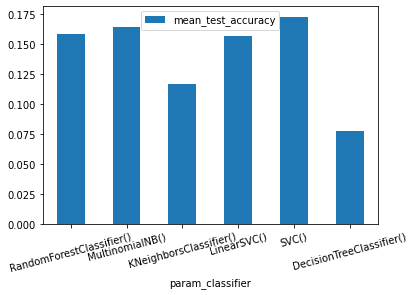

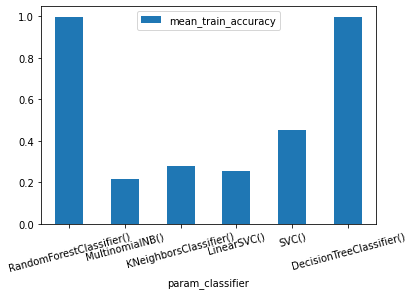

<AxesSubplot:xlabel='param_classifier'>

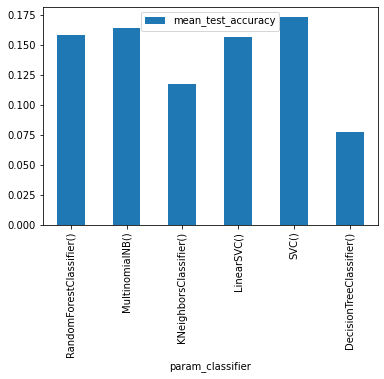

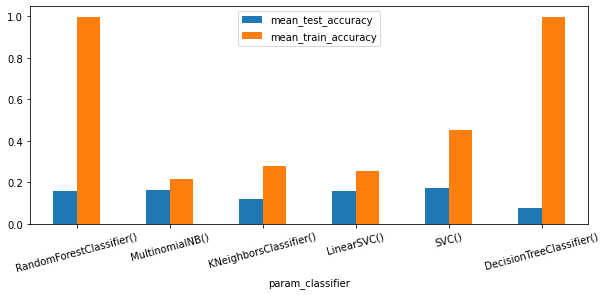

In [8]:
plot(d1, ['param_classifier'], ['mean_test_accuracy', 'mean_train_accuracy'])
d1.plot.bar(x='param_classifier', y='mean_test_accuracy')
plt.rcParams['figure.figsize'] = [10, 4]
d1.filter(regex='^mean_(test|train)_accuracy$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

In [9]:
#plot(d, regex_2, 'param_classifier_C')
model = foo(problem_transform.ClassifierChain(), parameters_6_classifiers)
d2 = model.cv_results_

/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

{'classifier': SVC()} 0.1855855855855856
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.872068      0.004411         0.066048        0.001046   
1       0.007919      0.000309         0.008662        0.000175   
2       0.012114      0.000202         0.050921        0.000687   
3       0.102547      0.008320         0.009132        0.000199   
4       0.076352      0.001217         0.025222        0.002312   
5       0.015022      0.000368         0.009013        0.000362   

           param_classifier                                    params  \
0  RandomForestClassifier()  {'classifier': RandomForestClassifier()}   
1           MultinomialNB()           {'classifier': MultinomialNB()}   
2    KNeighborsClassifier()    {'classifier': KNeighborsClassifier()}   
3               LinearSVC()               {'classifier': LinearSVC()}   
4                     SVC()                     {'classifier': SVC()}   
5  DecisionTreeClassifier()  {'classifier': Decisio

<AxesSubplot:xlabel='param_classifier'>

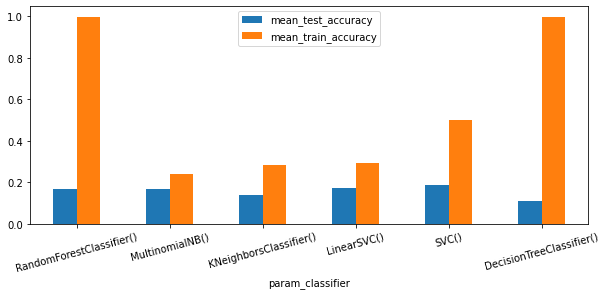

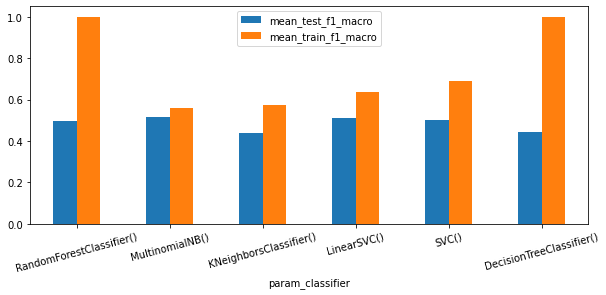

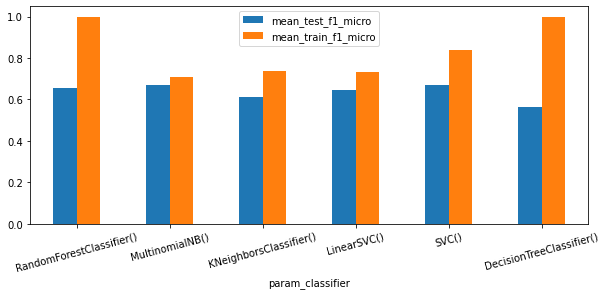

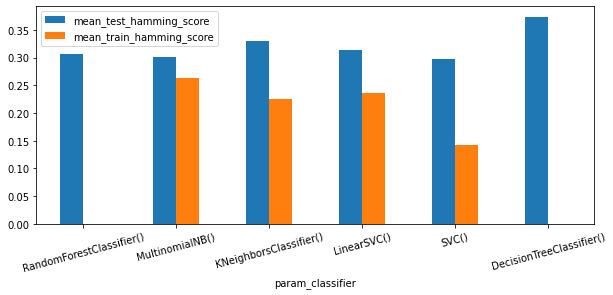

In [10]:
d2.filter(regex='^mean_(test|train)_accuracy$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)
d2.filter(regex='^mean_(test|train)_f1_macro$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)
d2.filter(regex='^mean_(test|train)_f1_micro$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)
d2.filter(regex='^mean_(test|train)_hamming_score$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

In [30]:
model = foo(problem_transform.LabelPowerset(), parameters_6_classifiers)
d3 = model.cv_results_

{'classifier': SVC(C=100.0, gamma=0.0001), 'classifier__C': 100.0, 'classifier__gamma': 0.0001} 0.19099099099099098
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.026718      0.000797         0.021211        0.000846   
1        0.026767      0.000482         0.021040        0.000681   
2        0.026177      0.000696         0.020550        0.000198   
3        0.026409      0.001012         0.020135        0.000185   
4        0.026697      0.000606         0.020974        0.000539   
..            ...           ...              ...             ...   
76       0.069758      0.002128         0.020786        0.000913   
77       0.067726      0.002298         0.020349        0.000089   
78       0.086722      0.003009         0.021440        0.000309   
79       0.086617      0.003504         0.021218        0.000171   
80       0.087161      0.002318         0.021189        0.000411   

              param_classifier param_classifier__C param_classifier

In [61]:
model = foo(problem_transform.BinaryRelevance(), parameters_svc)

{'classifier': SVC(C=10.0, gamma=0.01), 'classifier__C': 10.0, 'classifier__gamma': 0.01} 0.1963963963963964
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.058979      0.001040         0.020441        0.000334   
1        0.056709      0.001250         0.019550        0.000714   
2        0.056633      0.002287         0.019617        0.000675   
3        0.058523      0.002408         0.019767        0.000855   
4        0.055710      0.001223         0.019092        0.000176   
..            ...           ...              ...             ...   
76       0.099084      0.000851         0.026828        0.000658   
77       0.101042      0.001662         0.026773        0.000538   
78       0.130690      0.002173         0.033923        0.000467   
79       0.130938      0.001004         0.031962        0.001093   
80       0.131537      0.000878         0.031863        0.000455   

           param_classifier param_classifier__C param_classifier__gamma  \

In [68]:
d = pd.DataFrame(model.cv_results_)
best_column = d.iloc[model.best_index_]
print(best_column)

mean_fit_time                               0.0715902
std_fit_time                               0.00127583
mean_score_time                             0.0197975
std_score_time                            0.000381897
param_classifier              SVC(C=10.0, gamma=0.01)
                                       ...           
split2_train_hamming_score                   0.218844
split3_train_hamming_score                   0.211336
split4_train_hamming_score                   0.208333
mean_train_hamming_score                     0.216592
std_train_hamming_score                    0.00581044
Name: 47, Length: 68, dtype: object


<AxesSubplot:xlabel='classifier'>

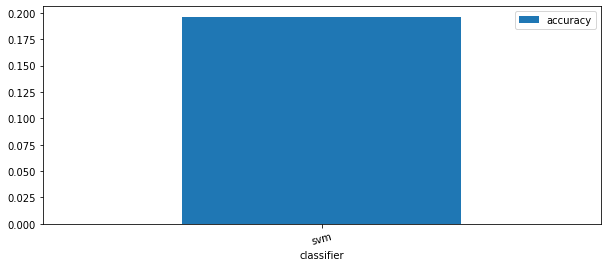

In [80]:
data = {
    'classifier': ['svm'],
    'accuracy': best_column['mean_test_accuracy']
}
pd.DataFrame(data).plot.bar(x='classifier', rot=15)

<AxesSubplot:xlabel='classifier'>

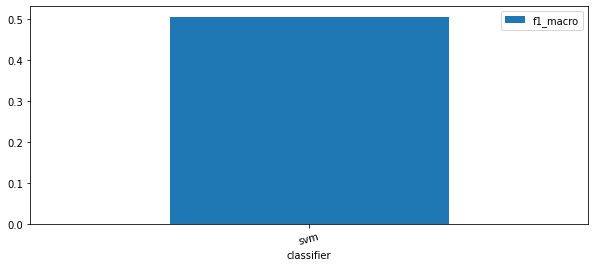

In [81]:
data = {
    'classifier': ['svm'],
    'f1_macro': best_column['mean_test_f1_macro']
}
pd.DataFrame(data).plot.bar(x='classifier', rot=15)

In [82]:
d = pd.DataFrame()
d['param_classifier'] = d1['param_classifier']
d['mean_test_accuracy_br'] = d1['mean_test_accuracy']
d['mean_test_accuracy_cc'] = d2['mean_test_accuracy']
d['mean_test_accuracy_lp'] = d3['mean_test_accuracy']
d.plot.bar(x='param_classifier', rot=15)

KeyError: 'param_classifier'